# Example Tutorial
## Welcome to DustyDisk! 

You can import the whole package by ```import DustyDisk```. 

Currently, there are two main modules within the package: ```Functions```, ```Plotting```. There is also the ```Constants``` module that just holds relevant astrophysical constants in cgs units. 

The file ```PlotStyling.mplstyle``` exists in this directory that you can use by ```plt.style.use()``` if you'd like a chosen plot styling for figures. Simply comment out the line if you desire to make your own plot styling or use the default in ```matplotlib```.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DustyDisk.Constants as Constants
from DustyDisk.Functions import Initialize_System
from DustyDisk.Plotting import *
plt.style.use('PlotStyling.mplstyle')

For this example notebook, we will create a toy model for our astrophysical disk system. This will also demonstrate how the functionality of ```DustyDisk``` works. As the user, you will need to provide various input quantities about your system. This includes numpy arrays for the radial binning, gas density, gas temperature, mean molecular weight of the gas, and central star mass. You can also vary the grain size of the dust in the system, but a default value is defined. 

All units are in cgs and ```DustyDisk``` currently only supports a 1D spherical coordinate system. <br>

In the cell below, we initialize a toy model for our system.

In [ ]:
rmin = 0.1 * Constants.AU
rmax = 100 * Constants.AU
N = 1000 # number of points
r = np.linspace(rmin, rmax, N)
rbump = 30*Constants.AU # introduces artificial bump in density
bump_width = 5*Constants.AU 
sigma_gas_0 = 200 
# surface density
gas_density = (sigma_gas_0 * (r / Constants.AU)**(-1.0)) * (1 + np.exp(-((r - rbump) / bump_width)**2))
gas_temp = 280 # Kelvin
mugas = 2.34  # mean molecular weight of gas
Mstar = 1 * Constants.Msun

: 

: 

: 

We will call the first function in this package, ```DustyDisk.Functions.Initialize_System()```. Calling this will take the input information set in the cell above and create a ```Grid()``` class that will be used to model the dust distribution in the system.

In [ ]:
toyGrid = Initialize_System(r, gas_density, gas_temp, mugas, Mstar, grain_size=1e-3)

: 

: 

: 

Under the hood, ```toyGrid``` is a ```Grid``` class that has taken the gas density and temperature profiles for the system and made hydrodynamical estimates on the dust distribution and drift velocity. The rest of this example will utilize the ```DustyDisk.Plotting``` module to show the various plotting functions available in this package to explore the dust behavior. 

```DustyDisk.Plotting.PlotQuantity()``` takes in a ```Grid()``` object and list of various properties that the user desires to plot. The possible quantities are ```Gas_Density```, ```Gas_Pressure```, ```Drift_Velocity```, and ```Dust_Density```. ```PlotQuantity``` allows you to easily plot many quantities at once, but makes a new axes for each quantity. The next example shows how you can plot on the same axes to look at the differences produced by varying dust grain size.

Running the cell below uses the ```PlotQuantity()``` function to easily demonstrate the initial conditions that the user can specify. Here, we are using the toy model, called ```ToyGrid``` made in the beginning of this tutorial. We introduce an exponential fall off in gas density with a small 'bump' in density (and therefore pressure). There are many reasons for `bump's in the pressure distribution for astrophysical disk systems, such as orbiting planets around the central star. Around these local maxima, the behavior of the pressure gradient forces dust particles towards these saddle points. This is the general idea of ```DustyDisk```: to model the dust settling based on user-input density and temperature profiles. Dust settling plays a crucial role in planet formation.

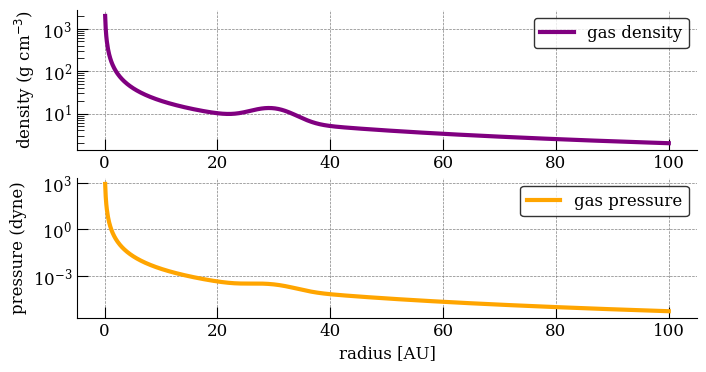

: 

: 

: 

In [ ]:
PlotQuantity(toyGrid, ['Gas_Density', 'Gas_Pressure'])

Now, let's explore how varying the grain size can affect the dust distribution in the disk. In the cell below, we will create different ```Grid()``` objects for a differente grain size (note, you must create a new ```Grid``` class for each set of input parameters that you wish to plot). We will also use the ```DustyDisk.Plotting.PlotDriftVelocity()``` and ```DustyDisk.Plotting.PlotDustDensity()``` functions to directly plot a specific quantity (as opposed to ```PlotQuantities()```), but with more control since we can now specify the axes, color, and label for our figure. 

Inspecting the resulting figure demonstrates how our package calculates the normalized dust density and how the profile changes for different grain sizes.

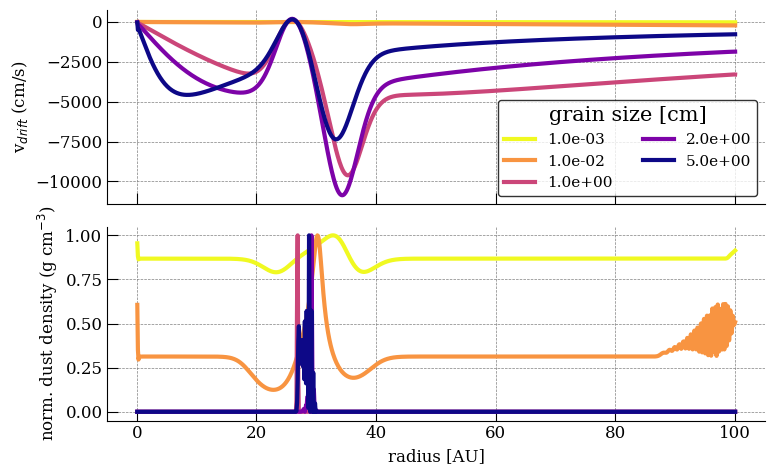

: 

: 

: 

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8,5), sharex=True)
grain_sizes = np.array([1e-3, 1e-2, 1, 2, 5])
colors = plt.cm.plasma_r(np.linspace(0, 1, len(grain_sizes)))

for gs_i, gs in enumerate(grain_sizes):
    Grid_i = Initialize_System(r, gas_density, gas_temp, mugas, Mstar, grain_size=gs)

    PlotDriftVelocity(Grid_i, ax[0], color=colors[gs_i], label='%.1e'%gs)
    PlotDustDensity(Grid_i, ax[1], color=colors[gs_i], label='%.1e'%gs)

for axi in ax:
    axi.grid()
ax[0].legend(title='grain size [cm]', ncol=2, fontsize=11)
ax[1].set_xlabel('radius [AU]')
plt.tight_layout()

We have also implemented a 2D-visualization module in ```DustyDisk.Plotting``` called ```PlotSpherical2D_DustImage()```. 

Assuming spherical symmetry, ```PlotSpherical2D_DustImage()``` takes in a grid object and extrapolates the 1D normalized dust density calculation into a 2D image of what the dust distribution would look like for the input system. 

You can also "zoom" in or out of the domain by setting ```cutfrac```, which controls how much of the domain to ignore (e.g. ```cutfrac=.4``` only shows the inner 60 percent of the domain in each dimension). 

This function allows another avenue to explore the difference in grain sizes, but from a more visual perspective.

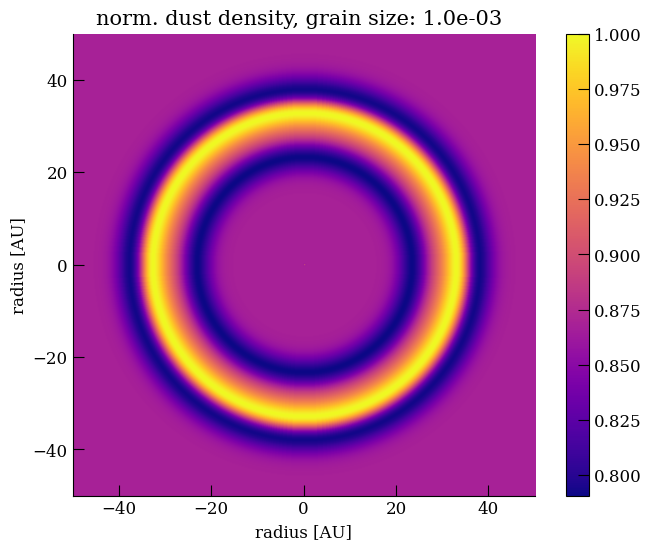

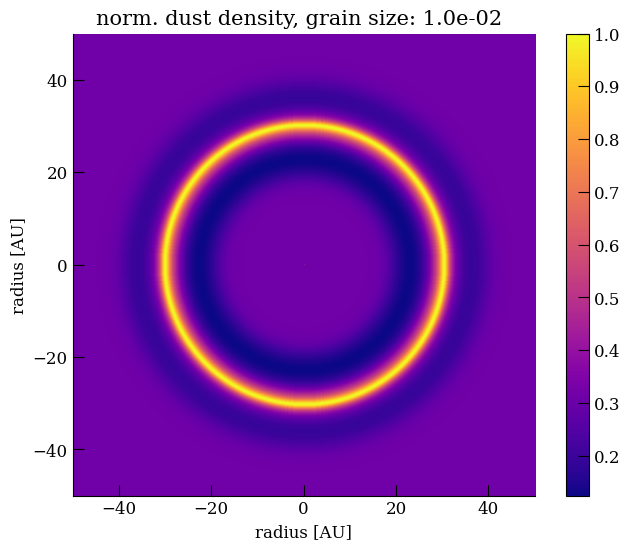

: 

: 

: 

In [ ]:
toyGrid_smallgrain = Initialize_System(r, gas_density, gas_temp, mugas, Mstar, grain_size=1e-3)
PlotSpherical2D_DustImage(toyGrid_smallgrain, cutfrac=0.5)
# what about larger grain size? 
toyGrid_largegrain = Initialize_System(r, gas_density, gas_temp, mugas, Mstar, grain_size=1e-2)
PlotSpherical2D_DustImage(toyGrid_largegrain, cutfrac=0.5)

Let's try multiple bumps in density!

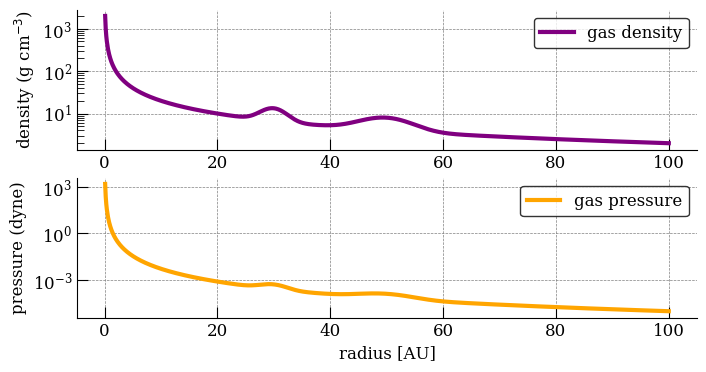

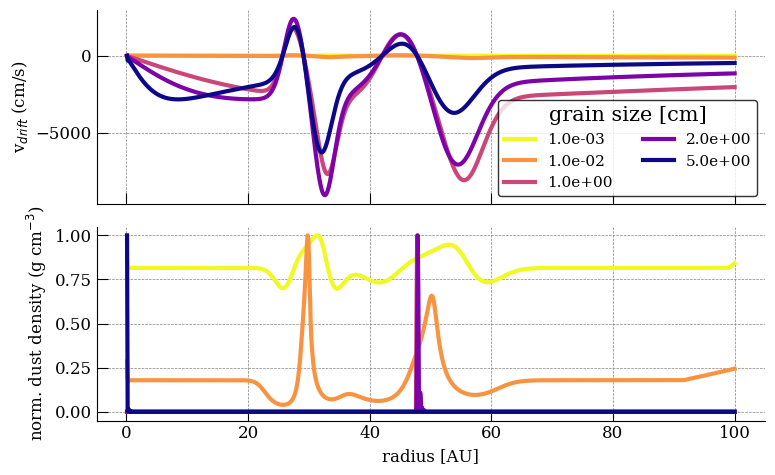

: 

: 

: 

In [ ]:
au = Constants.AU
r = np.linspace(0.1, 100, 1000) * au
rbumps = np.array([30, 50]) * au
bump_widths = np.array([3, 6]) * au
sigma_gas_0 = 200 

sigma_gas = 1
for i in range(2):
    sigma_gas += np.exp(-((r - rbumps[i]) / bump_widths[i])**2)
sigma_gas *= sigma_gas_0 / (r/au)

Tgas = 300 # Kelvin, assume constant temperature for now 
mugas = 2.34  # mean molecular weight of gas
Mstar = 3 * Constants.Msun

twobumpGrid = Initialize_System(r, sigma_gas, Tgas, mugas, Mstar, grain_size=1e-3)
PlotQuantity(twobumpGrid, ['Gas_Density', 'Gas_Pressure'])
fig, ax = plt.subplots(2, 1, figsize=(8,5), sharex=True)
grain_sizes = np.array([1e-3, 1e-2, 1, 2, 5])
colors = plt.cm.plasma_r(np.linspace(0, 1, len(grain_sizes)))

for gs_i, gs in enumerate(grain_sizes):
    twobumpGrid = Initialize_System(r, sigma_gas, Tgas, mugas, Mstar, grain_size=gs)

    PlotDriftVelocity(twobumpGrid, ax[0], color=colors[gs_i], label='%.1e'%gs)
    PlotDustDensity(twobumpGrid, ax[1], color=colors[gs_i], label='%.1e'%gs)

for axi in ax:
    axi.grid()
ax[0].legend(title='grain size [cm]', ncol=2, fontsize=11)
ax[1].set_xlabel('radius [AU]')
plt.tight_layout()

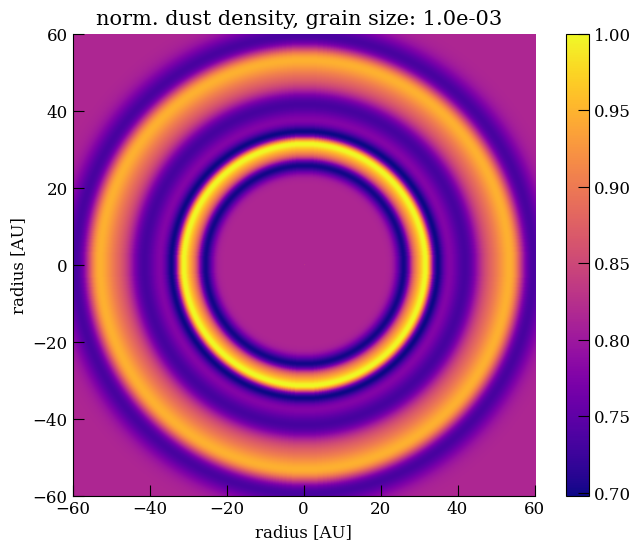

: 

: 

: 

In [ ]:
twobumpGrid = Initialize_System(r, sigma_gas, Tgas, mugas, Mstar, grain_size=1e-3)
PlotSpherical2D_DustImage(twobumpGrid, cutfrac=0.4)

: 

: 

: 